# Lyrics detector Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a lyrics classifier. For a given verse $X$, our model should learn to predict the artist $y$. The dataset consists of lyrics scrapped from the Genius website.

### Objectives:
- Text preprocessing
- Text embedding
- Train a RNN to detect the artist behind a set of lyrics

In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

## 1. Data Cleaning

Our dataset contains around 4,000 verses of lyrics from different artists: Drake, Ed Sheeran and Kanye West (the verses are given in this order).

In [306]:
raw_data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/verses.csv")
data = raw_data.copy() # From now on, update `data` as you see fit and don't touch raw_data
data

,artist,verse
0,Drake,"Ayy, woah Ayy, ayy Yeah"
1,Drake,I'm makin' a change today The liquor been taki...
2,Drake,"I can't just be with you and only you Yeah, I ..."
3,Drake,"Well, summer, all I did was rest, okay? And Ne..."
4,Drake,I'm makin' a change today The liquor been taki...
...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol..."
3971,Kanye West,"Then one day I just went ahead and played it, ..."
3972,Kanye West,"""I ain't gonna front, it's kinda hot."""
3973,Kanye West,Like they still weren't looking at me like a r...


❓ **Have a look at the verse index 18th**. 
- What do you observe?
- Clean verses from non standard characters using [`unidecode.unidecode()`](https://pypi.org/project/Unidecode/)

In [307]:
# YOUR CODE HERE
data.iloc[18]

artist                                                Drake
verse     Ayy, yeah Pipe this shit up and I turn this sh...
Name: 18, dtype: object

It is full of commas, uppercase and bad words :)

In [308]:
import string

#first let's clean up punctuation
def punctuation(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['clean_verse'] = data['verse'].apply(punctuation)
data

,artist,verse,clean_verse
0,Drake,"Ayy, woah Ayy, ayy Yeah",Ayy woah Ayy ayy Yeah
1,Drake,I'm makin' a change today The liquor been taki...,Im makin a change today The liquor been takin ...
2,Drake,"I can't just be with you and only you Yeah, I ...",I cant just be with you and only you Yeah I go...
3,Drake,"Well, summer, all I did was rest, okay? And Ne...",Well summer all I did was rest okay And New Ye...
4,Drake,I'm makin' a change today The liquor been taki...,Im makin a change today The liquor been takin ...
...,...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol...",Dame was like Yo you got a deal with Capitol O...
3971,Kanye West,"Then one day I just went ahead and played it, ...",Then one day I just went ahead and played it I...
3972,Kanye West,"""I ain't gonna front, it's kinda hot.""",I aint gonna front its kinda hot
3973,Kanye West,Like they still weren't looking at me like a r...,Like they still werent looking at me like a ra...


In [309]:
#then lowercase it

def lower_case(text):
        text = text.lower()
        return text
        
data['clean_verse'] = data['clean_verse'].apply(lower_case)
data

,artist,verse,clean_verse
0,Drake,"Ayy, woah Ayy, ayy Yeah",ayy woah ayy ayy yeah
1,Drake,I'm makin' a change today The liquor been taki...,im makin a change today the liquor been takin ...
2,Drake,"I can't just be with you and only you Yeah, I ...",i cant just be with you and only you yeah i go...
3,Drake,"Well, summer, all I did was rest, okay? And Ne...",well summer all i did was rest okay and new ye...
4,Drake,I'm makin' a change today The liquor been taki...,im makin a change today the liquor been takin ...
...,...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol...",dame was like yo you got a deal with capitol o...
3971,Kanye West,"Then one day I just went ahead and played it, ...",then one day i just went ahead and played it i...
3972,Kanye West,"""I ain't gonna front, it's kinda hot.""",i aint gonna front its kinda hot
3973,Kanye West,Like they still weren't looking at me like a r...,like they still werent looking at me like a ra...


In [310]:
#and remove potential numbers

def numbers(text):
    return ''.join(word for word in text if not word.isdigit())
    

data['clean_verse'] = data['clean_verse'].apply(numbers)
data

,artist,verse,clean_verse
0,Drake,"Ayy, woah Ayy, ayy Yeah",ayy woah ayy ayy yeah
1,Drake,I'm makin' a change today The liquor been taki...,im makin a change today the liquor been takin ...
2,Drake,"I can't just be with you and only you Yeah, I ...",i cant just be with you and only you yeah i go...
3,Drake,"Well, summer, all I did was rest, okay? And Ne...",well summer all i did was rest okay and new ye...
4,Drake,I'm makin' a change today The liquor been taki...,im makin a change today the liquor been takin ...
...,...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol...",dame was like yo you got a deal with capitol o...
3971,Kanye West,"Then one day I just went ahead and played it, ...",then one day i just went ahead and played it i...
3972,Kanye West,"""I ain't gonna front, it's kinda hot.""",i aint gonna front its kinda hot
3973,Kanye West,Like they still weren't looking at me like a r...,like they still werent looking at me like a ra...


In [311]:
# and stop words

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk

stop_word = set(stopwords.words('english')) 

def stop_words(text):
    word_tokens = word_tokenize(text)
    text = [w for w in word_tokens if not w in stop_word]
    return text

data['clean_verse'] = data['clean_verse'].apply(stop_words)

❓ **Check if some verses are duplicated.** 
- It can be frequent in music lyrics.
- If so, remove them to avoid data leaks between train and test sets

In [312]:
print('There are ',len(data['verse']) - len(data['verse'].drop_duplicates()), 'duplicate verses.')

There are  936 duplicate verses.


In [313]:
data.drop_duplicates(subset='verse', inplace=True)

In [314]:
data.shape

(3039, 3)

In [315]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    shape=data.shape,
    verses=data.verse[:50]
)

result.write()

## 2. Data Analysis (given to you)

👉 **We check the number of unique artist and the number of verses per artist**

In [316]:
data.artist.value_counts()

Drake         1394
Ed Sheeran     867
Kanye West     778
Name: artist, dtype: int64

👉 **For each artist, let's have a look at the top-10 most used words to see if they look similar?**

We'll use Tensorflow's [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer)'s index_word

In [317]:
drake = data[data.artist =='Drake'].clean_verse
ed = data[data.artist =='Ed Sheeran'].clean_verse
kanye = data[data.artist =='Kanye West'].clean_verse

In [318]:
tokenizer_drake = tf.keras.preprocessing.text.Tokenizer()
tokenizer_ed = tf.keras.preprocessing.text.Tokenizer()
tokenizer_kanye = tf.keras.preprocessing.text.Tokenizer()

tokenizer_drake.fit_on_texts(drake)
tokenizer_ed.fit_on_texts(ed)
tokenizer_kanye.fit_on_texts(kanye)

In [319]:
pd.DataFrame(data={
    "Drake": pd.Series(tokenizer_drake.index_word)[:10],
    "Ed Sheeran": pd.Series(tokenizer_ed.index_word)[:10],
    "Kanye West": pd.Series(tokenizer_kanye.index_word)[:10],
})

,Drake,Ed Sheeran,Kanye West
1,im,im,im
2,like,need,like
3,know,love,know
4,got,’,get
5,yeah,dont,got
6,dont,like,dont
7,get,know,oh
8,shit,ill,aint
9,’,man,yeah
10,go,oh,cant


👉 **Let's quantify how much vocabulary do they have in common**

- An artist **vocabulary** is the **set** of all unique used words
- We compute the `ratio` of (i) the length of vocabulary they **share**, over (ii) the length of the **total** vocabulary of the dataset

<details>
    <summary>Hints</summary>

We'll use Python [`set.intersection()`](https://www.programiz.com/python-programming/methods/set/intersection) and [`set.union()`](https://www.programiz.com/python-programming/methods/set/union)
</details>

In [320]:
drake_vocabulary = set(tokenizer_drake.index_word.values())
ed_vocabulary = set(tokenizer_ed.index_word.values())
kanye_vocabulary = set(tokenizer_kanye.index_word.values())

In [321]:
common_vocabulary = drake_vocabulary.intersection(ed_vocabulary).intersection(kanye_vocabulary)
global_vocabulary = drake_vocabulary.union(ed_vocabulary).union(kanye_vocabulary)

ratio = len(common_vocabulary)/len(global_vocabulary)
print(f"{ratio*100:.2f}% of the artists' vocabulary is common")

13.95% of the artists' vocabulary is common


## 3. Data Preprocessing

### 3.1 Word Embedding
We now need to think about embedding our sentences into numbers. We will be using [`gensim.models.Word2Vec`](https://radimrehurek.com/gensim/models/word2vec.html#gensim.models.word2vec.Word2Vec) to embed each word of the sentence and concatenate the embeddings of the words forming the sentence.

❓ **Transform the list of strings (verses) into a list of word sequences (a word sequence is a list of words contained in a string)**
- Store these sequences of words in a new column `data["seq"]` in your dataframe
- You can use `tensorflow.keras.preprocessing.text.text_to_word_sequence` 

In [322]:
data.rename(columns={'clean_verse':'seq'}, inplace=True)
data

,artist,verse,seq
0,Drake,"Ayy, woah Ayy, ayy Yeah","[ayy, woah, ayy, ayy, yeah]"
1,Drake,I'm makin' a change today The liquor been taki...,"[im, makin, change, today, liquor, takin, pain..."
2,Drake,"I can't just be with you and only you Yeah, I ...","[cant, yeah, got, one, virgil, got, one, two, ..."
3,Drake,"Well, summer, all I did was rest, okay? And Ne...","[well, summer, rest, okay, new, years, stretch..."
4,Drake,I'm makin' a change today The liquor been taki...,"[im, makin, change, today, liquor, takin, pain..."
...,...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol...","[dame, like, yo, got, deal, capitol, okay, man..."
3971,Kanye West,"Then one day I just went ahead and played it, ...","[one, day, went, ahead, played, wanted, play, ..."
3972,Kanye West,"""I ain't gonna front, it's kinda hot.""","[aint, gon, na, front, kinda, hot]"
3973,Kanye West,Like they still weren't looking at me like a r...,"[like, still, werent, looking, like, rapper, i..."


❓ **Let's check if we can cap the length of each sequences without losing too much information**
- Plot the distribution of sequences lengths using the [`seaborn.kdeplot`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn-displot) function
- Does it seem reasonable to limit ourself to 300 words per verse later on? 

<AxesSubplot:ylabel='Density'>

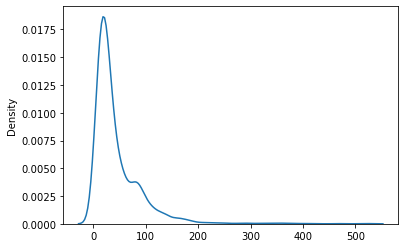

In [324]:
# YOUR CODE HERE
import seaborn as sns

sns.kdeplot([len(verse) for verse in data['seq']])

We won't loose too much information if we cut it at 300 words

❓ **Keep only the first `300` words of each sequences to reduce the useless long tail of long verses**

In [303]:
# YOUR CODE HERE
for seq in data['seq']:
    seq = seq[:300]

❓ **Train a `gensim.models.Word2Vec` model on your dataset** 
- You want to embed each word into vectors of dimension `100`
- No words should be excluded
- Give Word2Vec at least 50 epochs to be sure it converges
- Store these lists of vectors in a new column `data["embed"]`

In [327]:
# YOUR CODE HERE
#data['embed'] = Word2Vec(sentences=data['seq'], vector_size=100, min_count=0, epochs=50)

word2vec = Word2Vec(sentences=data['seq'], vector_size=100, min_count=0, epochs=50)

In [333]:
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

In [335]:
data['embed'] = embedding(word2vec, data['seq'])
data

,artist,verse,seq,embed
0,Drake,"Ayy, woah Ayy, ayy Yeah","[ayy, woah, ayy, ayy, yeah]","[[-1.1971027, -1.6323459, 1.6943508, 1.5499591..."
1,Drake,I'm makin' a change today The liquor been taki...,"[im, makin, change, today, liquor, takin, pain...","[[0.15587628, -0.59543973, 0.9916231, -0.19187..."
2,Drake,"I can't just be with you and only you Yeah, I ...","[cant, yeah, got, one, virgil, got, one, two, ...","[[-0.10299196, -1.333345, -0.1844497, 1.522284..."
3,Drake,"Well, summer, all I did was rest, okay? And Ne...","[well, summer, rest, okay, new, years, stretch...","[[-0.811294, 0.39181173, 2.195603, 0.094818465..."
4,Drake,I'm makin' a change today The liquor been taki...,"[im, makin, change, today, liquor, takin, pain...","[[0.15587628, -0.59543973, 0.9916231, -0.19187..."
...,...,...,...,...
3970,Kanye West,"Dame was like, ""Yo you got a deal with Capitol...","[dame, like, yo, got, deal, capitol, okay, man...","[[0.3778792, 0.15630779, -0.525261, -0.9297221..."
3971,Kanye West,"Then one day I just went ahead and played it, ...","[one, day, went, ahead, played, wanted, play, ...","[[0.2698087, 1.3146542, 1.6969621, -0.9752572,..."
3972,Kanye West,"""I ain't gonna front, it's kinda hot.""","[aint, gon, na, front, kinda, hot]","[[1.465748, -0.87207896, -2.2781005, -1.121774..."
3973,Kanye West,Like they still weren't looking at me like a r...,"[like, still, werent, looking, like, rapper, i...","[[-0.8813468, 0.8595779, 0.9318225, 0.25077006..."


In [336]:
# Check 
assert len(data['embed']) == len(data)

### 3.2 Create (X,y)

❓ **Create your numpy array `X` of shape (number_of_verses, 300, 100)**

- 300 words per verse (pad verses shorter than 300 with zeros at the end) 
- each words being a vector of size 100

<img src="https://raw.githubusercontent.com/lewagon/data-images/master/DL/padding.png" width=400>

In [339]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# YOUR CODE HERE
X = pad_sequences(data['embed'], dtype='float32', padding='post', maxlen=300)

In [340]:
X.shape

(3039, 300, 100)

❓ **Create the numpy array `y` of shape `(n_verses, 3)` that contains the one-hot-encoded list of labels, for the RNN**

In [345]:
# YOUR CODE HERE
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
y_sparse = cat_encoder.fit_transform(data[['artist']])
y = y_sparse.toarray()

y.shape

(3039, 3)

👉 We train/test split the dataset below for you

In [346]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [347]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_preprocessing',
    n_zeros = np.sum(X == 0),
    X_shape = X.shape,
    y_shape = y.shape,
)

result.write()

## 4. Recurrent Neural Network

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! wget \
'https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_lyrics_solution.pickle'

import pickle
with open("data_lyrics_solution.pickle", "rb") as file:
    (X_train, y_train, X_test, y_test) = pickle.load(file)
    
! rm data_lyrics_solution.pickle
```

❓ **First, store your baseline accuracy to beat as `score_baseline`**
- Consider predicting always the most frequent artist

In [408]:
column_sums

array([1108.,  699.,  624.])

In [407]:
# YOUR CODE HERE

column_sums = y_train.sum(axis=0)

score_baseline = np.max(column_sums) / len(X_train)
score_baseline

0.455779514603044

❓ **Create a RNN architecture to predict the artists `y`  given verses `X`** :

- Keep it simple: use only one LSTM layer and one *hidden* dense layer between the input and output layers
- Don't forget to take care of fake "zeros" added during preprocessing
- Store it into the `model` variable.

In [393]:
#malheureusement impossible de runner ce model à cause de problème de dépendance (mac M1 chip apple).. J'espère que vous serz indulgents!

vocab_size = len(word2vec.wv)
embedding_size = 20

embedding_size = 20
model_rnn = Sequential()
model_rnn.add(layers.Embedding(
    input_dim=vocab_size, # vocab_size
    input_length=300, # sentences_lengths
    output_dim=20, # embedding_size
    mask_zero=True))
model_rnn.add(layers.LSTM(10))
model_rnn.add(layers.Dense(1, activation="sigmoid"))

NotImplementedError: Cannot convert a symbolic Tensor (lstm_7/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

❓ **Train your `model` on the `(X_train, y_train)` training set**
- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 3 minutes of training without GPUs.

In [36]:
# YOUR CODE HERE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

❓ **Plot the training and validation losses through training**

In [37]:
# Plot below your train/val loss history
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Save your accuracy on test set as `score_test`**

In [40]:
# YOUR CODE HERE

🧪 **Send your results below**

In [33]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    loss = model.loss,
    input_shape = list(model.input.shape),
    layer_names = [layer.name for layer in model.layers],
    final_activation = model.layers[-1].activation.__wrapped__._keras_api_names[0],
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()